In [1]:
# load and clean data

data = """
1,27.4
2,25.1
3,24.0
4,22.8
5,22.1
6,21.5
7,21.2
8,20.6
9,20.9
10,21.3
11,21.8
12,22.5
13,23.9
14,24.8
15,26.6
16,27.9
17,29.8
18,31.5
19,33.9
20,36.1
21,38.6
22,41.5
23,44.8
24,47.9
25,51.6
26,55.1
27,59.0
28,63.4
29,67.9
30,72.8
31,77.6
32,82.9
33,88.7
34,94.9
35,101.1
36,107.8
37,114.9
38,122.3
39,130.0
40,138.2
41,146.9
42,155.8
43,165.1
44,174.8
45,184.9
46,195.5
47,206.4
48,217.8
49,229.6
50,241.8
51,254.6
52,267.7
53,281.2
54,295.3
55,309.9
56,324.8
57,340.3
58,356.2
59,372.7
60,389.6
61,407.1
62,425.1
63,443.6
64,462.6
65,482.2
66,502.1
67,522.6
68,543.7
69,565.2
70,587.4
71,610.1
72,633.3
73,657.1
74,681.4
75,706.3
76,731.8
77,757.8
78,784.4
79,811.6
80,839.3
81,867.6
82,896.5
83,925.9
84,955.9
85,986.5
86,1017.6
87,1049.3
88,1081.6
89,1114.4
90,1147.8
91,1181.8
92,1216.3
93,1251.4
94,1287.1
95,1323.4
96,1360.2
97,1397.6
98,1435.6
99,1474.2
100,1513.3
"""
datas = data.split()
x, y = list(), list()
for data in datas:
    a, b = data.split(',')
    x.append(a)
    y.append(b)

In [2]:
# create array load numpy library
import numpy as np

X = np.array(x, dtype=float)
y = np.array(y, dtype=float)

In [3]:
# Design X for model

Xd = np.column_stack([np.ones((X.shape)), X, X ** 2])

In [4]:
# scale

X_mean = Xd[:, 1:].mean(axis=0)
X_std  = Xd[:, 1:].std(axis=0)
Xd[:, 1:] = (Xd[:, 1:] - X_mean) / X_std
y_mean = y.mean()
y_std  = y.std()
yd = (y - y_mean) / y_std

In [5]:
# msk split
np.random.seed(42)
val_size = 0.8
msk = np.random.rand(len(Xd)) < val_size

In [6]:
# create train, val data

X_train, X_val = Xd[msk], Xd[~msk]
y_train, y_val = yd[msk], yd[~msk]

In [7]:
# hyper parameter
lr = 0.01
eps = 1000

In [8]:
# hist lss
lss_hist = list()

In [9]:
# m_samples, n_features
m_train, n_train = X_train.shape

In [10]:
# theta (weight)

theta = np.zeros(n_train)

In [11]:
# model
for i in range(eps):
    err = X_train.dot(theta) - y_train
    lss = np.mean(err ** 2)
    lss_hist.append(lss)

    grad   = 2 / m_train * X_train.T.dot(err)
    theta -= lr * grad

In [12]:
# extract lss bot train val
lss_val = np.mean((X_val.dot(theta)- y_val) ** 2)
lss_train = np.mean((X_train.dot(theta)- y_train) ** 2)
print(f'lss val:{lss_val} - lss train: {lss_train}')

lss val:0.019359680390211274 - lss train: 0.01899042068555804


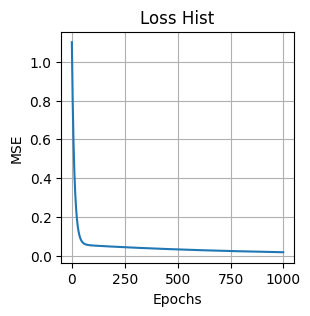

In [14]:
# load library
import matplotlib.pyplot as plt

# plot lss_hist on train
plt.figure(figsize=(3, 3))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Loss Hist')
plt.grid(True)
plt.plot(lss_hist)
plt.show()

In [ ]:
# if we use simple regression 